# 1. Load Packages

In [1]:
# And import the libraries

# pip install ipython-autotime
# import autotime
import IPython
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from IPython.display import HTML

%pylab inline
# pip install git+git://github.com/mgelbart/plot-classifier.git
from plot_classifier import plot_classifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

%matplotlib inline


pd.set_option("display.max_colwidth", 200)

Populating the interactive namespace from numpy and matplotlib


# 2. `train_test_split`

In [2]:
# How many dimensions (features) are there in the cities data? 
cities_df = pd.read_csv("data/canada_usa_cities.csv")
train_df, test_df = train_test_split(cities_df, test_size=0.2, random_state=123)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

train_df.head()

,longitude,latitude,country
160,-76.4813,44.2307,Canada
127,-81.2496,42.9837,Canada
169,-66.0580,45.2788,Canada
188,-73.2533,45.3057,Canada
187,-67.9245,47.1652,Canada


In [3]:
def plot_cities():
    plt.scatter(canada["longitude"], canada["latitude"], color="red", alpha=0.6)
    plt.scatter(usa["longitude"], usa["latitude"], color="blue", alpha=0.6)
    plt.scatter(one_city["longitude"], one_city["latitude"], color="black", s=300)
    plt.ylabel("latitude")
    plt.xlabel("longitude")
    plt.legend(labels=["Canada", "USA"], loc=1)
    plt.grid(True)

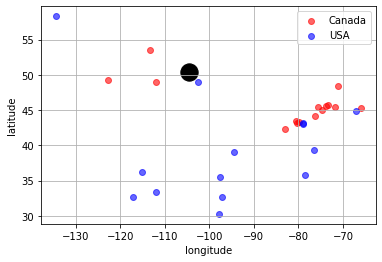

In [4]:
small_cities = cities_df.sample(30, random_state=90)
one_city = small_cities.sample(1, random_state=44)
small_train_df = pd.concat([small_cities, one_city]).drop_duplicates(keep=False)
canada = small_cities.query('country == "Canada"')
usa = small_cities.query('country == "USA"')
plot_cities()

# 3. KNN

### 3.1 Distance

In [5]:
from sklearn.metrics.pairwise import euclidean_distances

In [6]:
p1 = np.array([7, 0, 22, 11])
p2 = np.array([1, 0, 19, 9])

two_points = pd.DataFrame(np.array([p1,p2]))
euclidean_distances(two_points)


array([[0., 7.],
       [7., 0.]])

### 3.2 Explore K

In [7]:
from sklearn.neighbors import KNeighborsClassifier

X_train = small_train_df.drop(columns=["country"])
y_train = small_train_df["country"]

k_values = [1, 3]

for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    print(
        "Prediction of the black dot with %d neighbours: %s"
        % (k, neigh.predict(one_city.drop(columns=["country"])))
    )

Prediction of the black dot with 1 neighbours: ['USA']
Prediction of the black dot with 3 neighbours: ['Canada']


In [19]:
def knn_predict(x1_train, x2_train, y_train, k_values, x1_test, x2_test):
    small_data = pd.DataFrame({"x1": x1_train, 
                               "x2": x2_train,
                               "y": y_train})

    X_train, y_train = small_data.drop(columns=["y"]), small_data["y"]
    X_test = pd.DataFrame({"x1": x1_test,
                           "x2": x2_test})
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
#         knn = KNeighborsRegressor(n_neighbors=k)        
        knn.fit(X_train, y_train)
        print(f"k nearest neighbours of this test example are: \n{knn.kneighbors(X_test)}\n")
        print(f"predict the data nwith {k} neighbours: {knn.predict(X_test)} \n\n")        

In [20]:
x1_train = [5, 4, 2, 10, 9, 9]
x2_train = [2, 3, 2, 10, -1, 9]
y_train = [0, 0, 1, 1, 1, 2]
k_values = [1, 3]

x1_test = [0]
x2_test = [0]

knn_predict(x1_train, x2_train, y_train, k_values, x1_test, x2_test)

k nearest neighbours of this test example are: 
(array([[2.82842712]]), array([[2]]))

predict the data nwith 1 neighbours: [1] 


k nearest neighbours of this test example are: 
(array([[2.82842712, 5.        , 5.38516481]]), array([[2, 1, 0]]))

predict the data nwith 3 neighbours: [0] 




In [28]:
np.array([[1,2,3], [4,5,6], [7,8,9]]).ndim

2